In [1]:
## https://www.statology.org/logistic-regression-python/
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


In [4]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#view first six rows of dataset
print(data[0:6])
#find total observations in dataset
len(data.index)

   default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879
5        0        1   919.588530   7491.558572


10000

In [5]:
#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)  

In [6]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2870,   17],
       [  93,   20]])

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9633333333333334


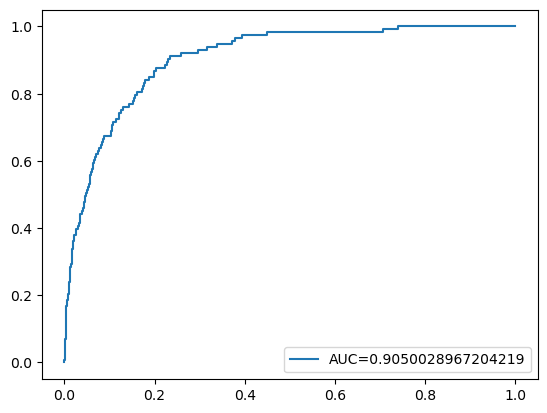

In [10]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
import seaborn as sns

## basic syntax
## sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#view first six rows of dataset
data[0:6]

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572


<Axes: xlabel='balance', ylabel='default'>

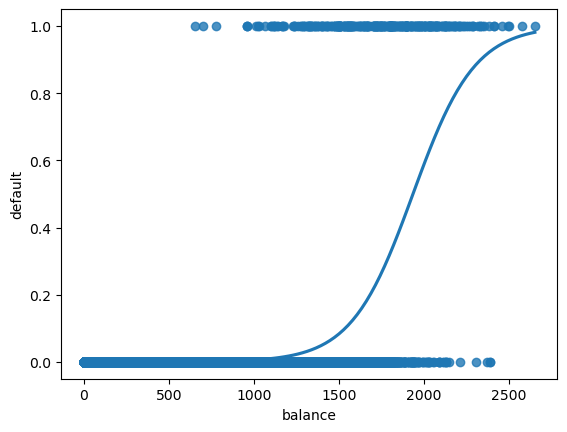

In [16]:
#define the predictor variable and the response variable
x = data['balance']
y = data['default']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)


<Axes: xlabel='balance', ylabel='default'>

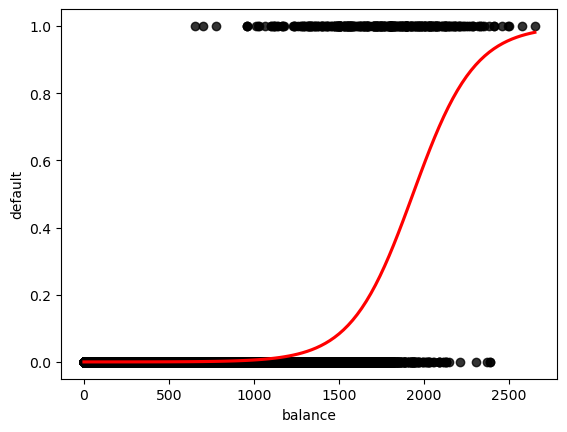

In [21]:
#define the predictor variable and the response variable
x = data['balance']
y = data['default']

#plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})